In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

/Users/RyanSampana/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('./carpdata.csv')

In [3]:
df.head()

,Unnamed: 0,species,huc8,day,month,date,decimalLatitude,decimalLongitude,status
0,0,molitrix,3150110,1,10,1984-10-1,32.606700,-85.889600,failed
1,1,molitrix,3150110,7,11,1986-11-7,32.606700,-85.889600,failed
2,2,molitrix,3150110,25,9,1984-9-25,32.612592,-85.879784,failed
3,3,molitrix,3160100,25,9,1996-9-25,33.643054,-87.897980,failed
4,4,molitrix,8020303,25,9,1975-9-25,34.488519,-91.254416,established


In [4]:
df.columns = [u'id', u'species', u'huc8', u'day', u'month', u'date',
       u'decimalLatitude', u'decimalLongitude', u'status']

In [5]:
df.head()

,id,species,huc8,day,month,date,decimalLatitude,decimalLongitude,status
0,0,molitrix,3150110,1,10,1984-10-1,32.606700,-85.889600,failed
1,1,molitrix,3150110,7,11,1986-11-7,32.606700,-85.889600,failed
2,2,molitrix,3150110,25,9,1984-9-25,32.612592,-85.879784,failed
3,3,molitrix,3160100,25,9,1996-9-25,33.643054,-87.897980,failed
4,4,molitrix,8020303,25,9,1975-9-25,34.488519,-91.254416,established


In [6]:
df[df['date'] == '2010-9']

,id,species,huc8,day,month,date,decimalLatitude,decimalLongitude,status
300,300,molitrix,10240011,0,9,2010-9,39.45594,-95.03252,established
301,301,molitrix,10240008,0,9,2010-9,39.92418,-95.65822,established
302,302,molitrix,10240008,0,9,2010-9,39.92786,-95.66912,established
303,303,molitrix,10240008,0,9,2010-9,39.89952,-95.72817,established
304,304,molitrix,10240005,0,9,2010-9,39.99217,-95.31451,established
305,305,molitrix,10240005,0,9,2010-9,39.97907,-95.29464,established
306,306,molitrix,10240005,0,9,2010-9,39.94781,-95.25710,established
307,307,molitrix,10240005,0,9,2010-9,39.94202,-95.25358,established


In [7]:
x = pd.to_datetime(df['date'])
y = []
for i in range(len(x)):
    y.append(datetime.datetime.strptime(str(x[i]),'%Y-%m-%d %H:%M:%S'))

In [8]:
ys = []
for i in range(len(y)):
    ys.append(y[i].year)

In [9]:
df['date'] = ys

### There are some data points which have day = 0. This is an error so we will probably just use date and month to classify

In [10]:
df[df['day'] == 0]

,id,species,huc8,day,month,date,decimalLatitude,decimalLongitude,status
300,300,molitrix,10240011,0,9,2010,39.45594,-95.03252,established
301,301,molitrix,10240008,0,9,2010,39.92418,-95.65822,established
302,302,molitrix,10240008,0,9,2010,39.92786,-95.66912,established
303,303,molitrix,10240008,0,9,2010,39.89952,-95.72817,established
304,304,molitrix,10240005,0,9,2010,39.99217,-95.31451,established
305,305,molitrix,10240005,0,9,2010,39.97907,-95.29464,established
306,306,molitrix,10240005,0,9,2010,39.94781,-95.25710,established
307,307,molitrix,10240005,0,9,2010,39.94202,-95.25358,established


# Okay so we are done with general data clean up

In [11]:
established = df[df['status'] == 'established']
established = established[['decimalLatitude','decimalLongitude','date']]
not_established = df[df['status'] != 'established']
not_established = not_established[['decimalLatitude','decimalLongitude','date']]
print "# established =",len(established)
print "# not established =", len(not_established)

# established = 2154
# not established = 148


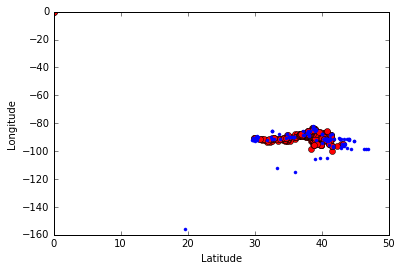

In [12]:
plt.figure()
plt.plot(established['decimalLatitude'],established['decimalLongitude'],'ro',label = 'established')
plt.plot(not_established['decimalLatitude'],not_established['decimalLongitude'],'b.',label='not established')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

## Looks like we have some outliers.. lets remove that! things seem to cluster between latitdue = [25,50]

(25, 50)

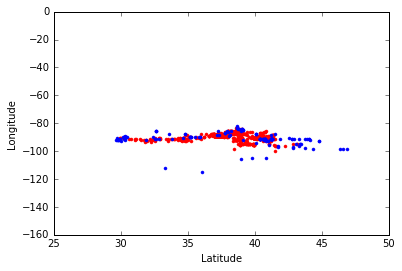

In [13]:
plt.figure()
plt.plot(established['decimalLatitude'],established['decimalLongitude'],'r.',label = 'established')
plt.plot(not_established['decimalLatitude'],not_established['decimalLongitude'],'b.',label='not established')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
# 
plt.xlim([25,50])

## Now lets place this in 3D with the year of the sighting as the third dimension

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


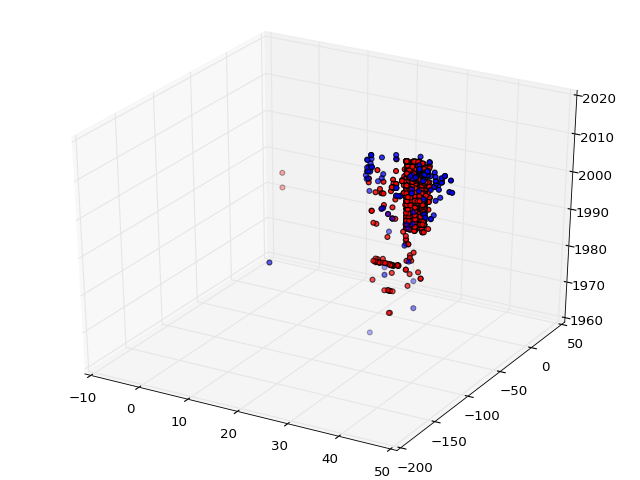

In [26]:
fig = plt.figure(2)

plt.clf()
ax = Axes3D(fig)
plt.cla()
ax.scatter(established['decimalLatitude'],established['decimalLongitude'],established['date'],c='r',marker='o')
ax.scatter(not_established['decimalLatitude'],not_established['decimalLongitude'],not_established['date'],c='b',marker='o')
plt.show()

# First test

## We notice that we have more established sightings of carp than not established. We define established as the sighting of a carp and not established as the l

In [17]:
from sklearn.cluster import KMeans

In [18]:
X = df[['decimalLatitude','decimalLongitude']]
X = X[X['decimalLatitude'] >=23]
X = np.array(X)
labels = df[df['decimalLatitude'] >= 23]
labels = labels['status']
labels = np.array(labels)

In [19]:
kmeans = KMeans(n_clusters=2,n_init=1000, random_state=0).fit(X)
print kmeans.cluster_centers_
predictions = kmeans.predict(X)
true_labels = []
for label in labels:
    if label == 'established':
        true_labels.append(1)
    else:
        true_labels.append(0)

[[ 39.95432992 -90.55373365]
 [ 36.70310376 -88.84951906]]


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(true_labels,predictions)

0.30882992605480641

# Lets try to classify with vector [Latitude, Longitude, Year]

In [21]:
X = df[['decimalLatitude','decimalLongitude','date']]
X = X[X['decimalLatitude'] >=23]
X = np.array(X)
labels = df[df['decimalLatitude'] >= 23]
labels = labels['status']
labels = np.array(labels)

In [22]:
kmeans = KMeans(n_clusters=2,n_init=1000, random_state=0).fit(X)
print kmeans.cluster_centers_
predictions = kmeans.predict(X)
true_labels = []
for label in labels:
    if label == 'established':
        true_labels.append(1)
    else:
        true_labels.append(0)

[[   39.06050292   -89.89269719  2009.25160537]
 [   38.67790693   -90.4474214   2000.22696246]]


In [23]:
accuracy_score(true_labels,predictions)

0.29621574597651151

# Lets split the data by year and classify by space

In [24]:
df = df[df['decimalLatitude'] >= 23]
dates = np.unique(df['date'])
date_table = []
length = []
accuracies = []
for date in dates:
    X = df[df['date'] == date]
    X = X[['decimalLatitude','decimalLongitude']]
    X = np.array(X)
    
    if len(X) == 1:
        pass
    else:
        labels = df[df['date'] == date]
        labels = np.array(labels['status'])
        true_labels = []
        for label in labels:
            if label == 'established':
                true_labels.append(1)
            else:
                true_labels.append(0)
        kmeans = KMeans(n_clusters=2,n_init=1000, random_state=0).fit(X)
        predictions = kmeans.predict(X)
        accuracy = accuracy_score(true_labels,predictions)
        accuracies.append(accuracy)
        date_table.append(date)
        length.append(len(X))      

In [25]:
results = pd.DataFrame([date_table,length,accuracies])
results = results.T
results.columns = ['date','dataSize','accuracy']
results.set_index('date')

,dataSize,accuracy
date,,
1975.0,2.0,0.500000
1981.0,7.0,0.142857
1983.0,2.0,0.500000
1984.0,3.0,0.666667
1986.0,5.0,0.000000
1987.0,3.0,0.666667
1988.0,31.0,0.580645
1989.0,3.0,0.333333
1991.0,3.0,0.666667


<IPython.core.display.Javascript object>


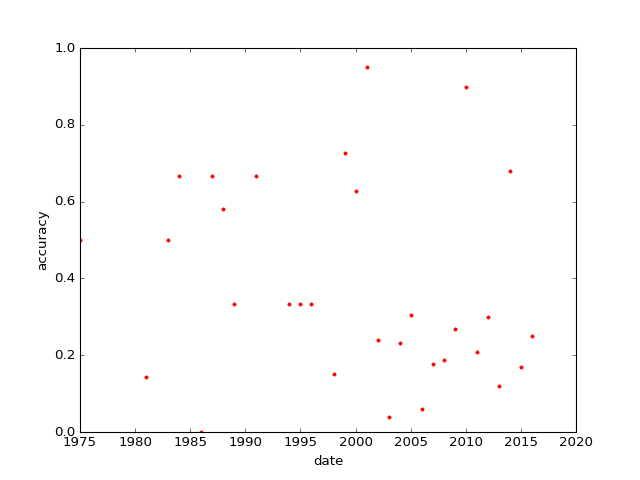

In [29]:
plt.figure()
plt.plot(date_table,accuracies,'r.')
plt.xlabel('date')
plt.ylabel('accuracy')